In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
%config Completer.use_jedi = False


In [2]:
global_temp=pd.read_csv('C:/Users/Joema/Desktop/Python Codes/Docs_Analysis/GlobalTemperatures.csv')
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [3]:
global_temp['dt']=pd.to_datetime(global_temp.dt)
global_temp['Years']=global_temp.dt.dt.year

In [4]:
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0 1750-01-01                   3.034                              3.574   
1 1750-02-01                   3.083                              3.702   
2 1750-03-01                   5.626                              3.076   
3 1750-04-01                   8.490                              2.451   
4 1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  Years  
0                                        NaN   1750  
1                                        NaN   1750  
2                                        NaN   1750  
3                                        NaN   1750  
4                                        NaN   1750

In [5]:
global_temp.Years.value_counts()
data=global_temp.groupby('Years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Years                              266 non-null    int64  
 1   LandAverageTemperature             266 non-null    float64
 2   LandAverageTemperatureUncertainty  266 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.4 KB


In [6]:
data.head()

Years  LandAverageTemperature  LandAverageTemperatureUncertainty
0   1750                8.719364                           2.637818
1   1751                7.976143                           2.781143
2   1752                5.779833                           2.977000
3   1753                8.388083                           3.176000
4   1754                8.469333                           3.494250

In [7]:
data['Uncertainty_top']=data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainty_bottom']=data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']
data.head()

Years  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0   1750                8.719364                           2.637818   
1   1751                7.976143                           2.781143   
2   1752                5.779833                           2.977000   
3   1753                8.388083                           3.176000   
4   1754                8.469333                           3.494250   

   Uncertainty_top  Uncertainty_bottom  
0        11.357182            6.081545  
1        10.757286            5.195000  
2         8.756833            2.802833  
3        11.564083            5.212083  
4        11.963583            4.975083

In [8]:
fig=px.line(data,x='Years',y=['LandAverageTemperature','Uncertainty_top', 'Uncertainty_bottom'],title='Avg. Land Temp')
fig.show()

In [9]:
global_temp['Month']=global_temp.dt.dt.month
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0 1750-01-01                   3.034                              3.574   
1 1750-02-01                   3.083                              3.702   
2 1750-03-01                   5.626                              3.076   
3 1750-04-01                   8.490                              2.451   
4 1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  Years  Month  
0                                        NaN   1750      1  
1                                        NaN   1750      2  
2                                        NaN   1750      3  
3                                        NaN   1750      4  
4                                        NaN   1750      5

In [10]:
#create the seasons columns
def season_identifier (months):
        if months>=3 and months<=5:
            return 'Spring'
        elif months>=6 and months<=8:
            return 'Summer'
        elif months>=9 and months<=11:
            return 'Autumn'
        elif months>=12 or months<=2:
            return 'Winter'
        else:
            raise BaseException 

global_temp['Season']=global_temp.Month.apply(season_identifier)

In [11]:
global_temp.head()
global_temp.tail()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
3187 2015-08-01                  14.755                              0.072   
3188 2015-09-01                  12.999                              0.079   
3189 2015-10-01                  10.801                              0.102   
3190 2015-11-01                   7.433                              0.119   
3191 2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  Years  Month  Season  
3187                                      0.057   2015      8  Summer  
3188                                      0.058   2015      9  Autumn  
3189                                      0.062   2015     10  Autumn  
3190                                      0.063   2015     11  Autumn  
3191                                      0.062   2015     12  Winter

In [12]:
global_temp.Season.value_counts()
global_temp.groupby('Season').agg({'LandAverageTemperature':'mean',})
#global_temp[global_temp['Season']=='Winter'['LandAverageTemperature'].mean()]

LandAverageTemperature
Season                        
Autumn                8.787336
Spring                8.111916
Summer               13.803120
Winter                2.811229

In [13]:
years=global_temp['Years'].unique()
years

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

In [14]:
spring_temps=[]
sp=global_temp['Season']=='Spring'
summer_temps=[]
su=global_temp['Season']=='Summer'
autumn_temps=[]
au=global_temp['Season']=='Autumn'
winter_temps=[]
wi=global_temp['Season']=='Winter'
# yy=global_temp['Years']==2015
# global_temp[ ss & yy ]['LandAverageTemperature'].mean()

In [15]:
for year in years:
    cy=global_temp['Years']==year
    spring_temps.append(global_temp[sp & cy]['LandAverageTemperature'].mean())
    summer_temps.append(global_temp[su & cy]['LandAverageTemperature'].mean())
    autumn_temps.append(global_temp[au & cy]['LandAverageTemperature'].mean())
    winter_temps.append(global_temp[wi & cy]['LandAverageTemperature'].mean())

In [16]:
summer_temps

[14.518333333333333,
 14.116,
 nan,
 14.608333333333334,
 14.208333333333334,
 14.430666666666667,
 13.963333333333333,
 17.544999999999998,
 12.934666666666665,
 13.541666666666666,
 12.916333333333334,
 17.057666666666666,
 14.070333333333332,
 14.262666666666666,
 12.170666666666667,
 12.635333333333334,
 13.655333333333331,
 14.023333333333333,
 12.905666666666667,
 14.365666666666668,
 11.639333333333335,
 14.045333333333332,
 13.775333333333334,
 13.639666666666669,
 15.330333333333334,
 13.822666666666668,
 14.503,
 12.627,
 13.212333333333333,
 13.335,
 14.625666666666666,
 13.368,
 14.469666666666667,
 13.793333333333331,
 14.537,
 14.226,
 14.261333333333333,
 13.791666666666666,
 14.720333333333334,
 14.269666666666666,
 13.827666666666667,
 13.529000000000002,
 13.357999999999999,
 13.547333333333333,
 12.784,
 13.576,
 14.417333333333334,
 13.999666666666664,
 14.317,
 14.211666666666666,
 13.662666666666667,
 13.466333333333331,
 14.379333333333333,
 14.764333333333333,
 

In [17]:
season=pd.DataFrame()

In [18]:
season['Year']=years
season['Spring_Temps']=spring_temps
season['Summer_Temps']=summer_temps
season['Autumn_Temps']=autumn_temps
season['Winter_Temps']=winter_temps

In [19]:
season.head()

Year  Spring_Temps  Summer_Temps  Autumn_Temps  Winter_Temps
0  1750      8.563000     14.518333      8.890000      2.963000
1  1751      6.735000     14.116000     10.673000      1.729000
2  1752      7.035500           NaN      7.587000      2.717000
3  1753      8.627333     14.608333      9.212333      1.104333
4  1754      9.074333     14.208333      8.957333      1.637333

In [20]:
fig1=px.line(season,x='Year', y=season.columns[1:], title='Avg Temp in Each Season')
fig1.show()

In [21]:
cities=pd.read_csv('C:/Users/Joema/Desktop/Python Codes/Docs_Analysis/GlobalLandTemperaturesByCity.csv')
cities.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [22]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [23]:
usa=cities[cities['Country']=='United States']
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687289 entries, 47555 to 8439246
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             687289 non-null  object 
 1   AverageTemperature             661524 non-null  float64
 2   AverageTemperatureUncertainty  661524 non-null  float64
 3   City                           687289 non-null  object 
 4   Country                        687289 non-null  object 
 5   Latitude                       687289 non-null  object 
 6   Longitude                      687289 non-null  object 
dtypes: float64(2), object(5)
memory usage: 41.9+ MB


In [24]:
df2=usa[usa['City'].isin(['New York','San Francisco','Los Angeles'])]

In [25]:
df2.head()

dt  AverageTemperature  AverageTemperatureUncertainty  \
4356748  1849-01-01               8.819                          2.558   
4356749  1849-02-01               9.577                          1.970   
4356750  1849-03-01              11.814                          2.173   
4356751  1849-04-01              13.704                          2.902   
4356752  1849-05-01              14.834                          2.017   

                City        Country Latitude Longitude  
4356748  Los Angeles  United States   34.56N   118.70W  
4356749  Los Angeles  United States   34.56N   118.70W  
4356750  Los Angeles  United States   34.56N   118.70W  
4356751  Los Angeles  United States   34.56N   118.70W  
4356752  Los Angeles  United States   34.56N   118.70W

In [26]:
df2['dt']=pd.to_datetime(df2['dt'])
df2.index=df2['dt']
df2['City']=df2['City'].astype('category')
df2['Country']=df2['Country'].astype('category')
del df2['dt']

<ipython-input-26-901f374e7579>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-901f374e7579>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-901f374e7579>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df2.head(2)
#df2.info()

AverageTemperature  AverageTemperatureUncertainty         City  \
dt                                                                           
1849-01-01               8.819                          2.558  Los Angeles   
1849-02-01               9.577                          1.970  Los Angeles   

                  Country Latitude Longitude  
dt                                            
1849-01-01  United States   34.56N   118.70W  
1849-02-01  United States   34.56N   118.70W

In [28]:
df2=df2['AverageTemperature']
df2.columns=['Temp']
df2.head()

dt
1849-01-01     8.819
1849-02-01     9.577
1849-03-01    11.814
1849-04-01    13.704
1849-05-01    14.834
Name: AverageTemperature, dtype: float64

In [29]:
df2.isna().value_counts()
df2.dropna(inplace=True)
df2.shape

<ipython-input-29-004842868872>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(7073,)

<AxesSubplot:xlabel='dt'>

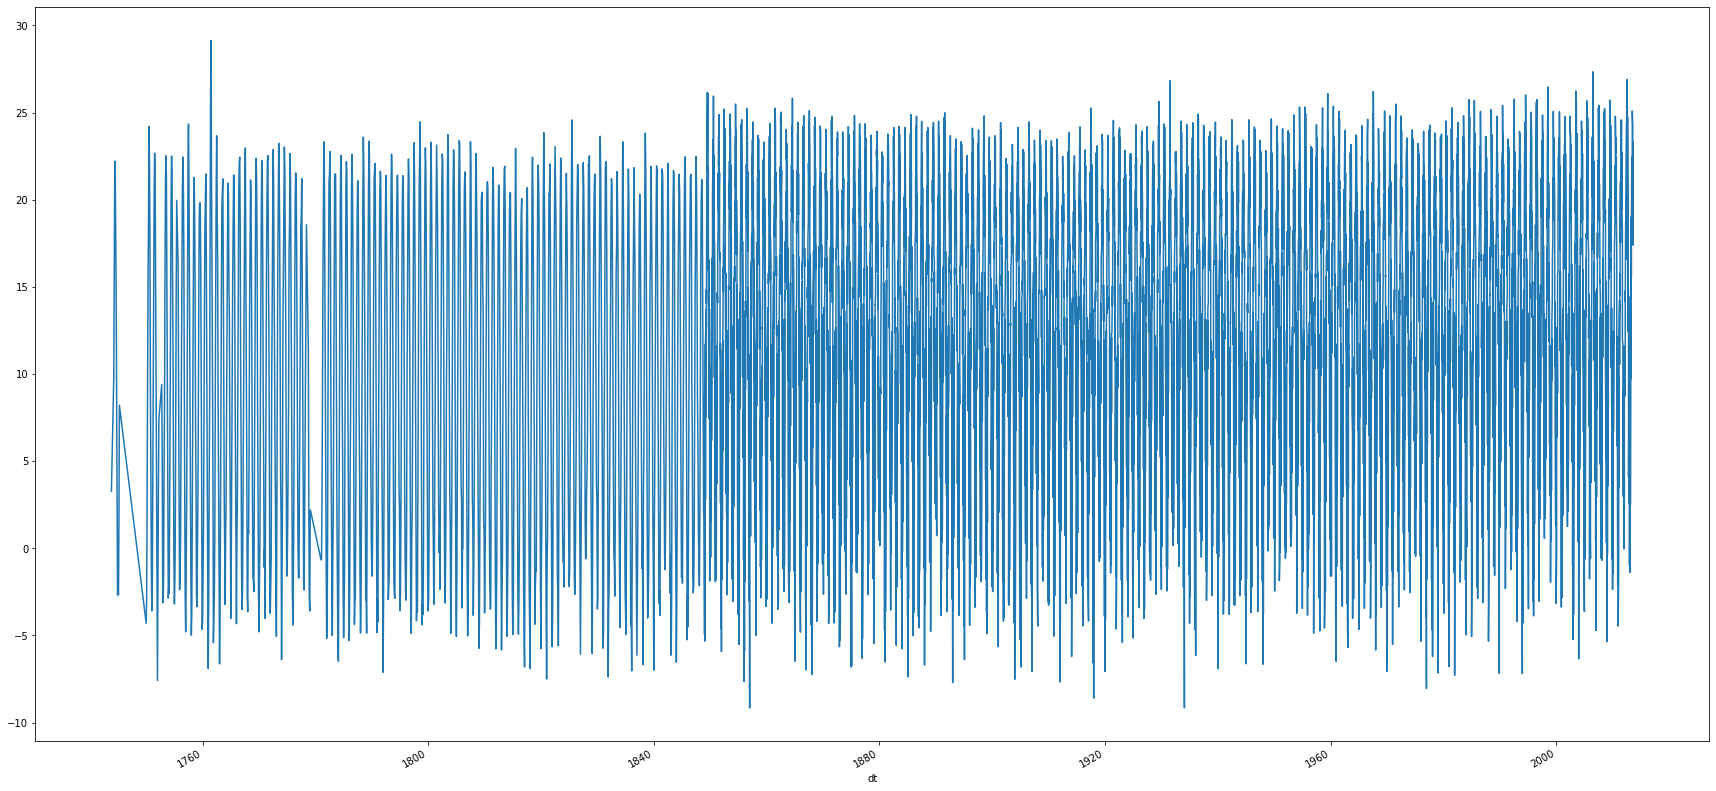

In [30]:
#checking to make sure the data is stationary(constant mean,std....making sure no trend)
df2.plot(figsize=(30,15))

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

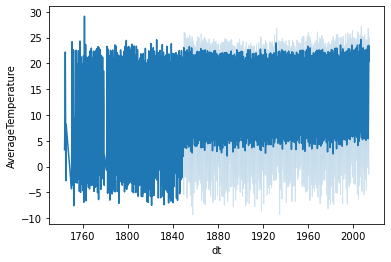

In [31]:
sns.lineplot(data=df2)

In [32]:
""""statistical testing of whether data is stationary or not. adfuller() is the statistical tool that test. This is 
called the Dickey-Fuller test"""
from statsmodels.tsa.stattools import adfuller

In [33]:
test_results=adfuller(df2)

In [34]:
"""most important value is the 'pvalue' which we are looking for a value less than 0.05 meaning we will have to 'reject
my null hypothesis' meaning the data is not stationary"""
def adfuller_summary (TimeSeries):
    results=adfuller(TimeSeries)
    labels=['ADF Test Statistics','p-value','#lags used','Number of observations used']
    
    for result,label in zip(results,labels):
        print (label + ': ' + str(result))
    if results[1]<0.05:
        return 'Strong evidence against the null hypo, reject null hypo, data has nop unit root and is stationary'
    else:
        return 'Weak evidence against the null hypo, accept the null hypo, data has no unit root and non stationary'


In [35]:
adfuller_summary(df2)

ADF Test Statistics: -2.0063893036757965
p-value: 0.2837786583333257
#lags used: 35
Number of observations used: 7037


'Weak evidence against the null hypo, accept the null hypo, data has no unit root and non stationary'

In [36]:
df2_copy=pd.DataFrame(df2.copy())

In [37]:
df2_copy.describe()
# type(df2_copy)

AverageTemperature
count         7073.000000
mean            12.676051
std              7.684649
min             -9.162000
25%              8.575000
50%             13.470000
75%             18.977000
max             29.141000

In [38]:
df2_copy['First_Temp_Diff']=df2_copy-df2_copy.shift(12)

In [39]:
df2_copy.head(20)

AverageTemperature  First_Temp_Diff
dt                                             
1849-01-01               8.819              NaN
1849-02-01               9.577              NaN
1849-03-01              11.814              NaN
1849-04-01              13.704              NaN
1849-05-01              14.834              NaN
1849-06-01              21.173              NaN
1849-07-01              26.159              NaN
1849-08-01              26.099              NaN
1849-09-01              21.848              NaN
1849-10-01              16.549              NaN
1849-11-01              10.907              NaN
1849-12-01               7.032              NaN
1850-01-01               7.087           -1.732
1850-02-01               8.575           -1.002
1850-03-01              10.365           -1.449
1850-04-01              13.735            0.031
1850-05-01              16.633            1.799
1850-06-01              20.241           -0.932
1850-07-01              23.445           -2.714
1850-08-01              25.935           -0.164

In [40]:
adfuller_summary(df2_copy['First_Temp_Diff'].dropna())

ADF Test Statistics: -21.239650404910893
p-value: 0.0
#lags used: 35
Number of observations used: 7025


'Strong evidence against the null hypo, reject null hypo, data has nop unit root and is stationary'

<AxesSubplot:xlabel='dt'>

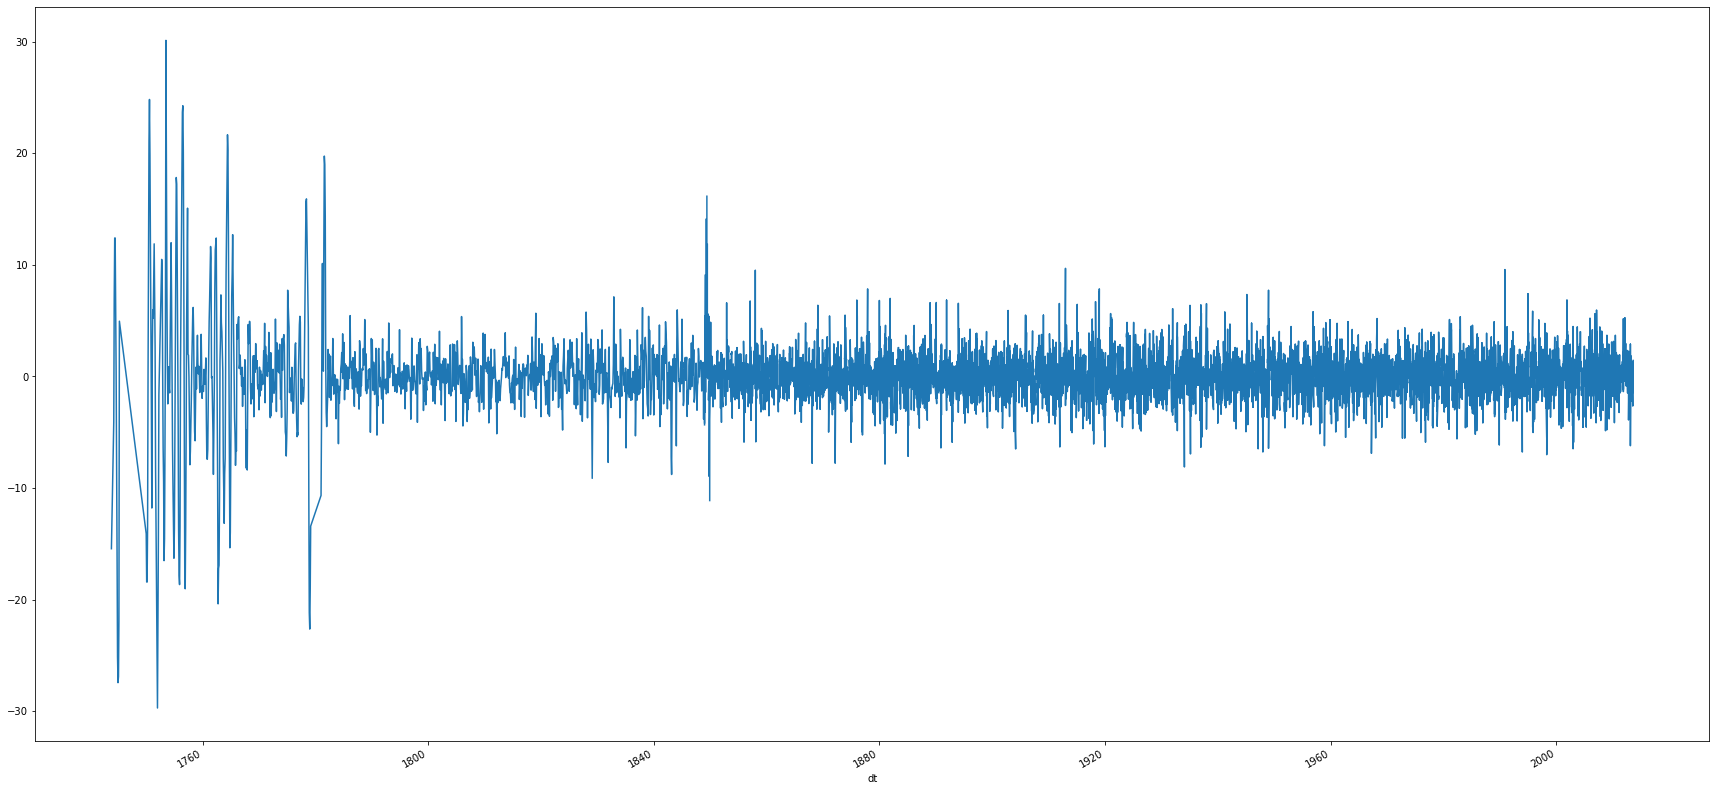

In [41]:
df2_copy['First_Temp_Diff'].plot(figsize=(30,15))

In [42]:
df2=pd.DataFrame(df2)
df2.rename_axis(index={'dt':'Date'},columns={'AverageTemperature':'Temp'},inplace=True)
df2.head()

AverageTemperature
Date                          
1849-01-01               8.819
1849-02-01               9.577
1849-03-01              11.814
1849-04-01              13.704
1849-05-01              14.834

In [43]:
df2['Month']=df2.index.month
df2['Year']=df2.index.year

In [44]:
df2.head()

AverageTemperature  Month  Year
Date                                       
1849-01-01               8.819      1  1849
1849-02-01               9.577      2  1849
1849-03-01              11.814      3  1849
1849-04-01              13.704      4  1849
1849-05-01              14.834      5  1849

In [45]:
df2.pivot_table(values='AverageTemperature',index='Month',columns='Year')

Year    1743    1744   1745    1750    1751   1752    1753    1754    1755  \
Month                                                                        
1        NaN     NaN -2.363  -4.310  -3.591 -7.588  -3.122  -2.252  -3.193   
2        NaN     NaN -2.671  -2.719  -2.051    NaN  -1.467  -2.583  -1.802   
3        NaN     NaN  1.363   2.773   3.256  3.322   4.207   2.728   1.112   
4        NaN   9.788  8.209   8.848   7.992  7.402   8.099     NaN   8.714   
5        NaN  15.708    NaN  15.411     NaN    NaN  15.330     NaN  15.238   
6        NaN  21.210    NaN  19.017  20.724    NaN  20.820  20.075  19.964   
7        NaN  22.207    NaN  24.203  22.668    NaN  22.524  22.503     NaN   
8        NaN     NaN    NaN  22.135  21.547    NaN  21.324  21.461     NaN   
9        NaN  14.922    NaN  17.445  15.812    NaN  15.548  16.281  16.137   
10       NaN   8.968    NaN   9.076     NaN  9.391  10.479  11.477   8.669   
11     3.264   3.161    NaN     NaN     NaN  5.831   3.363     NaN   3.599   
12       NaN  -2.681    NaN  -1.093     NaN -1.471  -2.854  -0.752  -2.381   

Year     1756  ...       2004       2005       2006       2007       2008  \
Month          ...                                                          
1      -1.985  ...   4.080333   4.923000   7.135333   5.656000   5.216333   
2       0.259  ...   6.100000   7.297000   7.547667   5.634000   6.754333   
3         NaN  ...  12.184000   9.124667   7.527333  10.586000   9.733667   
4         NaN  ...  13.806333  12.546000  12.051667  12.342000  13.113000   
5         NaN  ...  17.817333  15.982333  17.123333  17.150000  15.800333   
6      20.488  ...  19.872000  19.775333  21.395333  20.514333  21.474667   
7      22.452  ...  22.246333  23.611667  24.655333  22.628333  23.020000   
8      21.208  ...  22.101333  23.028333  21.920333  22.690000  22.305333   
9      17.345  ...  20.669333  19.427667  19.365333  19.559000  20.686667   
10      9.662  ...  14.205667  15.098000  14.368667  15.985667  15.699000   
11      2.894  ...   9.758333  11.739667  11.861333  10.836333  11.423000   
12     -2.900  ...   6.428000   6.582667   7.701667   5.474333   5.610667   

Year        2009       2010       2011       2012       2013  
Month                                                         
1       5.550333   5.776667   5.109333   7.177667   5.388333  
2       6.540667   6.788000   5.777333   7.970000   6.222667  
3       9.211000  10.486667   9.115000  10.604333  10.162333  
4      12.744000  12.254000  12.710000  13.075000  13.880000  
5      17.565667  15.856333  15.724000  17.670333  17.335333  
6      18.941667  20.436667  19.305000  19.904333  21.028333  
7      22.247667  22.538667  22.733333  22.654000  23.489667  
8      22.578000  21.665333  22.028667  23.384667  21.654667  
9      20.752667  20.537333  20.856333  20.655667  20.393333  
10     14.313333  15.170333  15.846667  16.147667        NaN  
11     11.484000  10.032333  10.378000  10.457667        NaN  
12      5.425333   6.119667   6.991000   6.749333        NaN  

[12 rows x 266 columns]

In [46]:
pivot=df2.pivot_table(values='AverageTemperature',index='Month',columns='Year')

<AxesSubplot:xlabel='Month'>

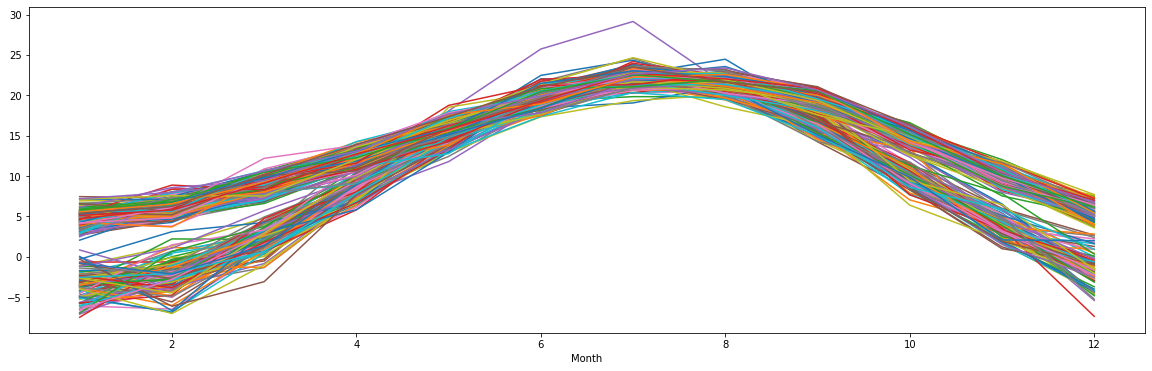

In [47]:
pivot.plot(figsize=(20,6), legend=None)
#showing temp seasonalities over the years

<AxesSubplot:xlabel='Month'>

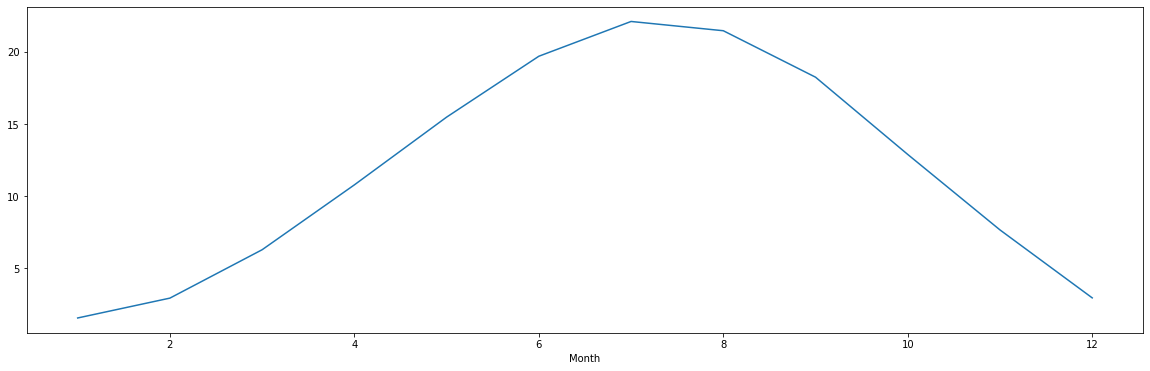

In [48]:
pivot.mean(axis=1).plot(figsize=(20,6))

In [49]:
#building time series model using Moving Average + evaluating the Moving Average model

In [50]:
#using the 'stationary' values of the dataset which is what is neccesary when creatin the Moving Average model
df2_copy.head()

AverageTemperature  First_Temp_Diff
dt                                             
1849-01-01               8.819              NaN
1849-02-01               9.577              NaN
1849-03-01              11.814              NaN
1849-04-01              13.704              NaN
1849-05-01              14.834              NaN

In [51]:
MA_model=df2_copy[['First_Temp_Diff']]
MA_model.head()

First_Temp_Diff
dt                         
1849-01-01              NaN
1849-02-01              NaN
1849-03-01              NaN
1849-04-01              NaN
1849-05-01              NaN

In [52]:
MA_model.dropna(inplace=True)
MA_model.head()

<ipython-input-52-b1d32273b488>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



First_Temp_Diff
dt                         
1850-01-01           -1.732
1850-02-01           -1.002
1850-03-01           -1.449
1850-04-01            0.031
1850-05-01            1.799

In [53]:
#the .rolling() method is often used in stock analysis. The window parameter is the period essentially.For instance:
"""If you wantyed to create a 20 day moving average it would be done as so. Then plottting it"""
MA_model['First_Temp_Diff'].rolling(window=20).mean()

dt
1850-01-01        NaN
1850-02-01        NaN
1850-03-01        NaN
1850-04-01        NaN
1850-05-01        NaN
               ...   
2013-05-01    0.38175
2013-06-01    0.41535
2013-07-01    0.49805
2013-08-01    0.51650
2013-09-01    0.55610
Name: First_Temp_Diff, Length: 7061, dtype: float64

In [54]:
"""Now that i have the moving average series above i need to concatenate the original data back to to make the df i'm 
going to plot"""
pd.concat([MA_model,MA_model['First_Temp_Diff'].rolling(window=20).mean()], axis=1)

First_Temp_Diff  First_Temp_Diff
dt                                          
1850-01-01           -1.732              NaN
1850-02-01           -1.002              NaN
1850-03-01           -1.449              NaN
1850-04-01            0.031              NaN
1850-05-01            1.799              NaN
...                     ...              ...
2013-05-01            0.879          0.38175
2013-06-01            1.277          0.41535
2013-07-01            1.025          0.49805
2013-08-01           -0.800          0.51650
2013-09-01            1.426          0.55610

[7061 rows x 2 columns]

In [55]:
temp_df=pd.concat([MA_model,MA_model['First_Temp_Diff'].rolling(window=20).mean()], axis=1)
temp_df.columns=['Actual_Temp_Diff', 'Forecast_Temp']

In [56]:
temp_df.head()

Actual_Temp_Diff  Forecast_Temp
dt                                         
1850-01-01            -1.732            NaN
1850-02-01            -1.002            NaN
1850-03-01            -1.449            NaN
1850-04-01             0.031            NaN
1850-05-01             1.799            NaN

In [62]:
from sklearn import mean_squared_error

ImportError: cannot import name 'mean_squared_error' from 'sklearn' (C:\Users\Joema\anaconda3\envs\pandas_playground\lib\site-packages\sklearn\__init__.py)

In [68]:
#This model below is showing the meausure of error in the calculation for each period. You have to isolate the values 
#below the NaN values
np.sqrt(mean_squared_error(temp_df['Forecast_Temp'][19:],temp_df['Actual_Temp_Diff'][19:]))

2.6896850765249716